# Visualizing Trajectories

## Overview

### Questions

* What tools can I use to view trajectories?

### Objectives

* Point users to **OVITO**.
* Examine the trajectory with **fresnel**.

In [1]:
import gsd.hoomd
import fresnel
import math

## OVITO

[OVITO](https://www.ovito.org/) reads **GSD** files and displays particles with the **shape** definition stored by the **Logger**.

TODO: add a little bit more information and screenshot.

**fresnel**

[Fresnel](https://fresnel.readthedocs.io/) is a Python package that produces publication quality renders with soft lighting, depth of field and other effects.
Let's use **fresnel** to examine the trajectory here.

First, let's use **GSD** to open the **trajectory** generated by the previous section of this tutorial.

In [2]:
traj = gsd.hoomd.open('trajectory.gsd')

This function will render a **trajectory** frame using **fresnel**.
Note: This is not intended as a full tutorial on **fresnel** - see the [fresnel user documentation](https://fresnel.readthedocs.io/) if you would like to learn more.

In [3]:
device = fresnel.Device()

def render(snapshot):
    vertices=[(math.sqrt(8/9), 0, -1/3),
              (-math.sqrt(2/9), math.sqrt(2/3), -1/3),
              (-math.sqrt(2/9), -math.sqrt(2/3), -1/3),
              (0,0,1)]
    poly_info = fresnel.util.convex_polyhedron_from_vertices(vertices)

    scene = fresnel.Scene(device)
    geometry = fresnel.geometry.ConvexPolyhedron(scene,
                                                 poly_info,
                                                 N=snapshot.particles.N)
    geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]),
                                                  roughness=0.8)
    geometry.position[:] = snapshot.particles.position[:]
    geometry.orientation[:] = snapshot.particles.orientation[:]
    geometry.outline_width = 0.01
    

    scene.lights = fresnel.light.lightbox()
    scene.camera = fresnel.camera.fit(scene, view='front', margin=0.1)
    return fresnel.pathtrace(scene, w=700, h=700, samples=500)

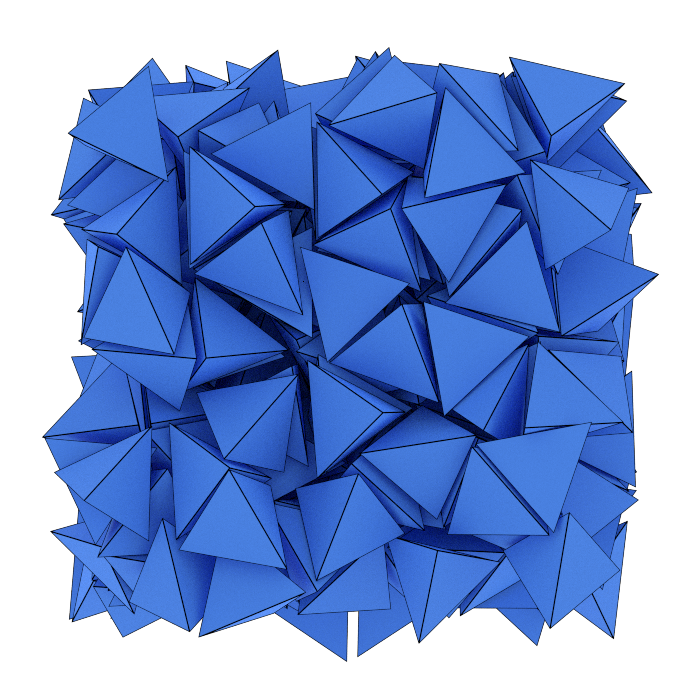

In [11]:
render(traj[-1])

In [5]:
print(len(traj))

74
